## Melbourne Housing Price 

#### Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv("Melbourne_housing_FULL.csv (1).zip")
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 4.5+ M

In [5]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

### Dealing with the missing values

In [7]:
# Now we will be dealing with the missing values. As we can see from the above dataset Postcode and Distance has 1 missing rows.
#No we will be dealing with the missing values of the price.
data = data[data.Postcode.notnull()]

In [8]:
print(data)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.

In [9]:
data = data[data.Price.notnull()]

In [10]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6440
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Lattitude         6253
Longtitude        6253
Regionname           2
Propertycount        2
dtype: int64

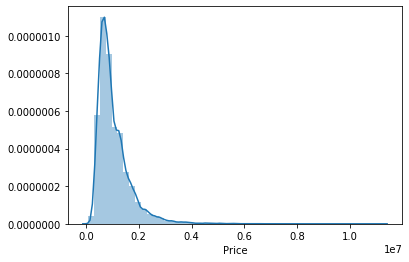

In [11]:
sns.distplot(data['Price'])

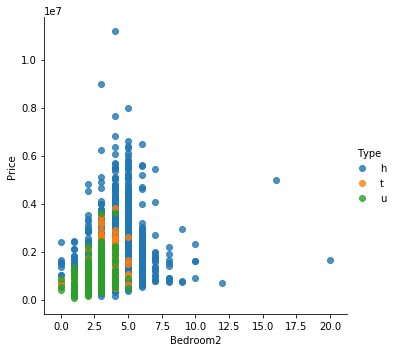

In [12]:
facet = sns.lmplot(data=data, x='Bedroom2', y='Price', hue='Type', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

In [13]:
data.loc[data.Bathroom.isnull(), 'Bathroom']  = data.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [14]:
data.loc[data.Car.isnull(), 'Car']  = data.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
data.loc[data.Landsize.isnull(), 'Landsize']  = data.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [15]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6440
Bathroom             1
Car                  0
Landsize             0
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Lattitude         6253
Longtitude        6253
Regionname           2
Propertycount        2
dtype: int64

In [16]:
# Council Area,Regionname, Property count , here 2 of the rows are missing . Well we cant determine that. 
data=data[data.Regionname.notnull()]

C:\Users\richa\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


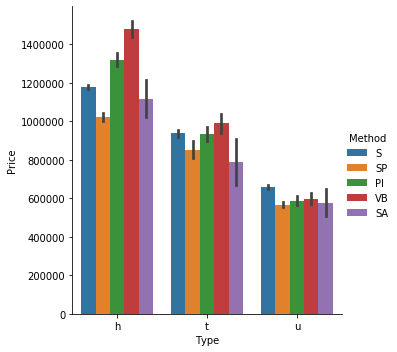

In [17]:
# Here we will be observing the prices of the different types 
sns.factorplot(x="Type", y="Price", hue = "Method", data= data, kind = "bar")

##### From the above factorplot it is quite clear that h type has higher prices compared to the rest two types.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

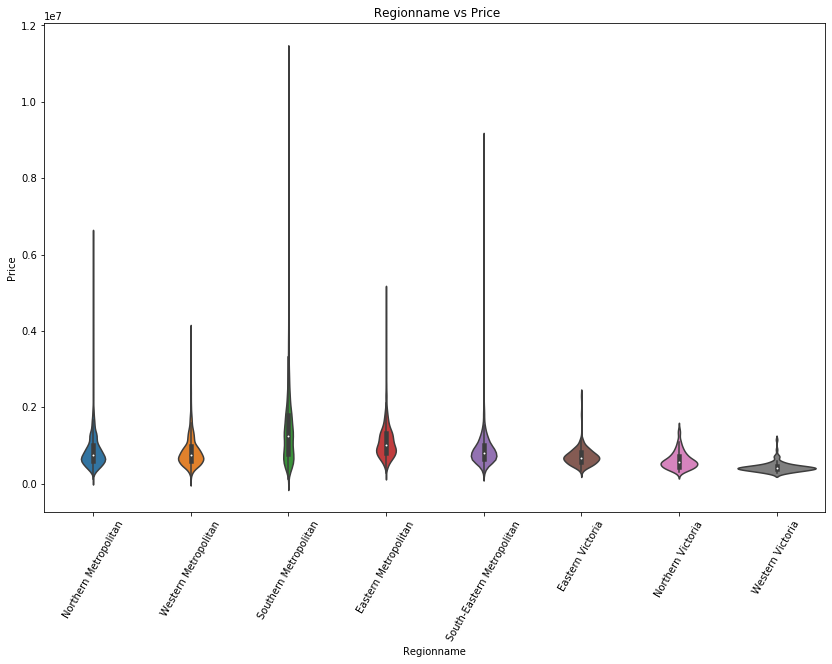

In [18]:
plt.figure(figsize=(14,9), facecolor='w', edgecolor='k')
sns.violinplot(data['Regionname'], data['Price'])
plt.title(" Regionname vs Price")
plt.xticks(rotation=60)

###### Here its very very clear from this violinplot that Southern Metropolitan is the most expensive region and has wider price region  and  Western Victoria is the cheapest region.

In [19]:
data.groupby('Regionname', as_index=False).agg({"Price": "mean"})

,Regionname,Price
0,Eastern Metropolitan,1.108723e+06
1,Eastern Victoria,7.143282e+05
2,Northern Metropolitan,8.614840e+05
3,Northern Victoria,6.190512e+05
4,South-Eastern Metropolitan,8.776827e+05
5,Southern Metropolitan,1.395928e+06
6,Western Metropolitan,8.376153e+05
7,Western Victoria,4.326068e+05


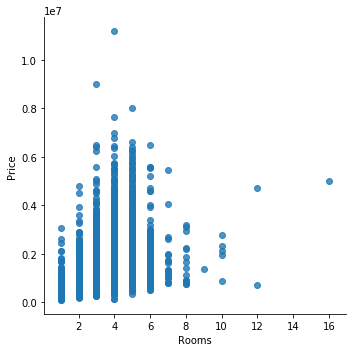

In [20]:
facet = sns.lmplot(data=data, x='Rooms', y='Price', fit_reg=False, legend=True, legend_out=True)

H type has higher price range between 4 to 6 rooms. 

In [21]:
data.groupby('Regionname')[['SellerG']].count()

,SellerG
Regionname,
Eastern Metropolitan,3272
Eastern Victoria,166
Northern Metropolitan,7864
Northern Victoria,166
South-Eastern Metropolitan,1341
Southern Metropolitan,8524
Western Metropolitan,5815
Western Victoria,96


In [22]:
data.groupby('Regionname', as_index=False).agg({"Car": "mean","Price": "mean","Rooms": "mean"})

,Regionname,Car,Price,Rooms
0,Eastern Metropolitan,1.811200,1.108723e+06,3.364914
1,Eastern Victoria,2.021627,7.143282e+05,3.518072
2,Northern Metropolitan,1.559221,8.614840e+05,2.804552
3,Northern Victoria,2.086313,6.190512e+05,3.457831
4,South-Eastern Metropolitan,1.906768,8.776827e+05,3.249814
5,Southern Metropolitan,1.615879,1.395928e+06,2.901807
6,Western Metropolitan,1.759570,8.376153e+05,3.076526
7,Western Victoria,2.017900,4.326068e+05,3.312500


In [23]:
data.groupby(['Regionname']).agg({ 'SellerG': "count", 'Rooms':"mean"})  

,SellerG,Rooms
Regionname,,
Eastern Metropolitan,3272,3.364914
Eastern Victoria,166,3.518072
Northern Metropolitan,7864,2.804552
Northern Victoria,166,3.457831
South-Eastern Metropolitan,1341,3.249814
Southern Metropolitan,8524,2.901807
Western Metropolitan,5815,3.076526
Western Victoria,96,3.312500


In [24]:
data=data[data.Bathroom.notnull()]
data['Bathroom'] = data['Bathroom'].apply(lambda x: round(x))
data['Car'] = data['Car'].apply(lambda x: round(x))

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6437
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16587
YearBuilt        15159
CouncilArea          0
Lattitude         6250
Longtitude        6250
Regionname           0
Propertycount        0
dtype: int64

Here we will be doing the Feature Engineering for more accuracy and the reliability.
converting the categorical data into numerical data.
using dummies.

In [26]:
data = pd.concat([data, pd.get_dummies(data["Type"]), pd.get_dummies(data["Method"]), pd.get_dummies(data["Regionname"])], axis=1)
data = data.drop(["Suburb", "Address", "SellerG", "CouncilArea", "Type", "Method", "Regionname"], 1)
data['Date'] = [pd.Timestamp(x).timestamp() for x in data["Date"]]
data = data.dropna()
data.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
2,2,1035000.0,1.459555e+09,2.5,3067.0,2.0,1,0,156.0,79.0,...,0,0,0,0,1,0,0,0,0,0
4,3,1465000.0,1.491178e+09,2.5,3067.0,3.0,2,0,134.0,150.0,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,1.459901e+09,2.5,3067.0,3.0,1,2,120.0,142.0,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,1.467677e+09,2.5,3067.0,4.0,2,0,245.0,210.0,...,0,0,0,0,1,0,0,0,0,0
14,2,1636000.0,1.470787e+09,2.5,3067.0,2.0,1,2,256.0,107.0,...,0,0,0,0,1,0,0,0,0,0
